##2. Machine Learning in Practice


##2.1. Importing Libraries

In [3]:
import pandas as pd
import sklearn
import numpy as np

##2.2. Loading Data

In [4]:
# page views [filename: pageview-activities.csv]
pageview_df = pd.read_csv('pageview-activities.csv')
print (pageview_df.head()) ## prints the top 5 (by default) rows of the data
print (pageview_df.shape) ## prints the number of rows and columns

# discussions [filename: discussion-activity.csv]
discussion_df = pd.read_csv('discussion-activity.csv')
print (discussion_df.head())
print (discussion_df.shape)
# videos (filename: video-activities.csv]
video_df=pd.read_csv('video-activities.csv')
print (video_df.head())
print (video_df.shape)
# quizzes [filename: quiz-activities.csv]
quiz_df = pd.read_csv('quiz-activities.csv')
print (quiz_df.head())
print (quiz_df.shape)
# exam grades [filename: exam-grades.csv]
exam_df = pd.read_csv('exam-grades.csv')
print (exam_df.head())
print (exam_df.shape)

              datetime  page_id  student_id
0  2018-01-18 05:52:21        8           1
1  2018-01-19 21:36:43        8           1
2  2018-01-31 21:12:38       12           1
3  2018-01-30 05:55:19        4           1
4  2018-01-07 12:46:17        2           1
(13463, 3)
              datetime  is_reply  student_id
0  2018-01-22 06:09:35         0           1
1  2018-01-19 09:23:59         1           1
2  2018-01-22 04:09:59         1           2
3  2018-01-26 09:53:48         1           2
4  2018-01-17 11:32:16         1           2
(1560, 3)
  action             datetime  student_id
0   play  2018-01-25 05:41:09           1
1  pause  2018-01-25 06:59:09           1
2   play  2018-01-19 04:06:25           1
3  pause  2018-01-19 05:23:25           1
4   play  2018-01-21 21:51:55           2
(3694, 3)
              datetime  quiz_id  student_id
0  2018-01-21 15:54:16        0           1
1  2018-02-13 22:53:48        1           1
2  2018-01-07 16:28:59        5           2
3  2018

##2.3. Feature Generation


In [5]:
pageview_counts = pageview_df.groupby('student_id').agg({'page_id': 'count'}).reset_index().rename(columns={'page_id': 'pw_count'})
pageview_counts.head(3)

,student_id,pw_count
0,1,27
1,2,31
2,3,22


In [6]:
############################################
# number of discussion posts per student
discussion_counts = discussion_df.groupby('student_id').agg({'datetime': 'count'}).reset_index().rename (columns={'datetime': 'disc_count'})
print (pageview_counts.head(3))

   student_id  pw_count
0           1        27
1           2        31
2           3        22


In [7]:
####################＃###＃#########＃##＃＃##＃##
# number of video events per student
video_counts = video_df.groupby('student_id').agg({'datetime': 'count'}).reset_index().rename (columns={'datetime': 'video_count'})
print (video_counts.head(3))

   student_id  video_count
0           1            4
1           2            2
2           3            2


In [8]:
#######并##########＃#########################
# number of quiz attempts per student
quiz_counts = quiz_df.groupby('student_id').agg({'datetime': 'count'}).reset_index().rename (columns= {'datetime': 'quiz count'})
print (quiz_counts.head(3))

   student_id  quiz count
0           1           2
1           2           3
2           3           4


##2.4. Preparing the Target Label

In [9]:
exam_df.head(3)

,StudentId,Pass,Grade
0,1,SUCCESS,89
1,2,SUCCESS,96
2,3,SUCCESS,80


In [10]:
exam_df.loc[exam_df['Pass'] == 'SUCCESS', 'PASS'] = 1
exam_df.loc[exam_df['Pass'] == 'FAIL', 'PASS'] = 0
exam_df.head(3)

,StudentId,Pass,Grade,PASS
0,1,SUCCESS,89,1.0
1,2,SUCCESS,96,1.0
2,3,SUCCESS,80,1.0


In [11]:
exam_df.drop(['Pass', 'Grade'], axis=1, inplace=True)
print (exam_df.head(3))
print (exam_df.shape)

   StudentId  PASS
0          1   1.0
1          2   1.0
2          3   1.0
(400, 2)


##2.5. Creating the Final Dataframe

In [12]:
student_df = pageview_counts.merge(discussion_counts, how='outer', on='student_id')
print (student_df.shape)
student_df = student_df.merge(video_counts, how='outer', on='student_id')
print (student_df.shape)
student_df = student_df.merge(quiz_counts, how='outer', on='student_id')
print (student_df.shape)
print (student_df.tail(10))

(400, 3)
(400, 4)
(400, 5)
     student_id  pw_count  disc_count  video_count  quiz count
390         391        23         2.0          8.0         1.0
391         392        20         2.0          8.0         3.0
392         393        14         3.0          8.0         NaN
393         394        25         2.0          2.0         4.0
394         395        17         2.0          6.0         NaN
395         396        18         2.0          NaN         NaN
396         397        25         4.0          4.0         2.0
397         398        14         3.0          6.0         3.0
398         399        22         4.0          4.0         4.0
399         400        15         3.0          2.0         3.0


In [13]:
student_df = student_df.fillna(0)
print (student_df.tail(10))

     student_id  pw_count  disc_count  video_count  quiz count
390         391        23         2.0          8.0         1.0
391         392        20         2.0          8.0         3.0
392         393        14         3.0          8.0         0.0
393         394        25         2.0          2.0         4.0
394         395        17         2.0          6.0         0.0
395         396        18         2.0          0.0         0.0
396         397        25         4.0          4.0         2.0
397         398        14         3.0          6.0         3.0
398         399        22         4.0          4.0         4.0
399         400        15         3.0          2.0         3.0


In [14]:
student_df = student_df.merge(exam_df.rename(columns={'StudentId': 'student_id'}), how='inner', on='student_id')
student_df.head(3)

,student_id,pw_count,disc_count,video_count,quiz count,PASS
0,1,27,2.0,4.0,2.0,1.0
1,2,31,6.0,2.0,3.0,1.0
2,3,22,6.0,2.0,4.0,1.0


##2.6. Visualizing and Interpreting the Data

In [15]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

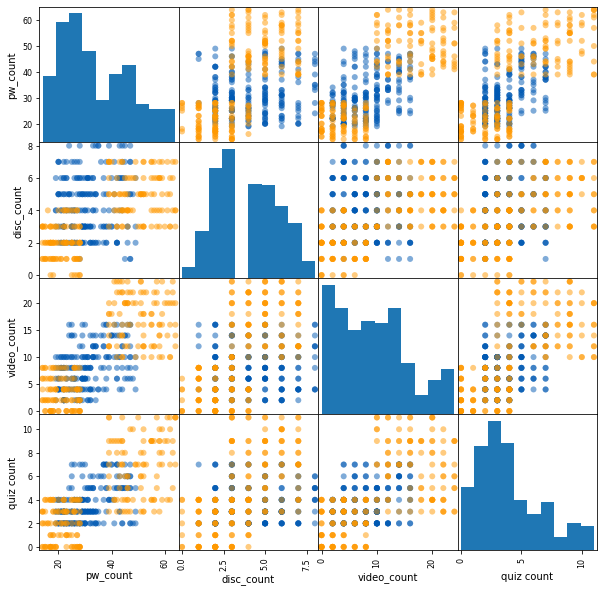

In [16]:
# plotting a scatter matrix
X = student_df.drop(['student_id', 'PASS'], axis=1)
y = student_df['PASS']
color_wheel = {1: "#0059b3", 0: "#ff9900"}
colors = y.map (lambda x: color_wheel.get(x))
scatter = pd.plotting.scatter_matrix(X, color=colors, marker = 'o', figsize=(10, 10))
plt.show()

##2.7. Building the Classification Model with kNN

In [17]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, y)
knn_classifier.score(X, y)

0.9125

In [19]:
# detault is 75% / 25% train-test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)#test_size=0.30,
print (len(X_train), len(X_test))

300 100


In [20]:
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.84

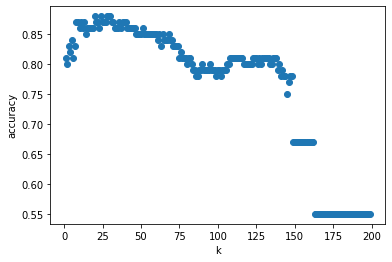

In [21]:
k_range = range(1,200)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.show()

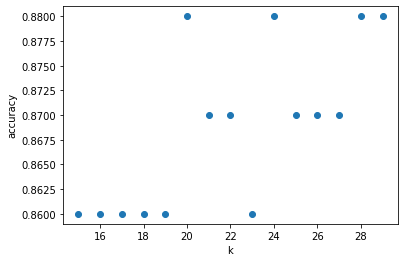

In [22]:
k_range = range(15,30)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.show()

In [23]:
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.88

##2.8. Overfitting

In [ ]:
knn = KNeighborsClassifier (n_neighbors = 1)
knn.fit (X_train [['pw_count', 'ttl_quiz_count']], y_train)
h = .02 # step size in the mesh
Y = y_test #['PASS']
import pylab as pl
x_min, x_max = X_train['pw_count'].min() - 0.5, X_train['pw_count'] .max() + 0.5
y_min, y_max = X_train['ttl_quiz_count'].min() - 0.5, X_train['ttl_quiz_count'].max() + 0.5
XX, YY = np.meshgrid (np.arange (x_min, x_max, h), np.arange (y_min, y_max, h))
z = knn.predict (np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape (xx.shape)
pl.figure(l, figsize= (9, 6))
pl.pcolormesh(xx, yy, Z)
# Plot also the training points
pl.scatter (X_train['pw_count'], X_train['ttl_quiz_count'], c=y_train, alpha=0.6, cmap=plt.cm.RdylBu)
pl.xlabel ('pw_count')
pl.ylabel ('ttl_quiz_count')
pl.xlim (xx.min(), xx.max())
pl.ylim (yy.min(), yy.max())
pl.xticks(())
pl.yticks(())
pl.show()

##2.9. Cross Validation

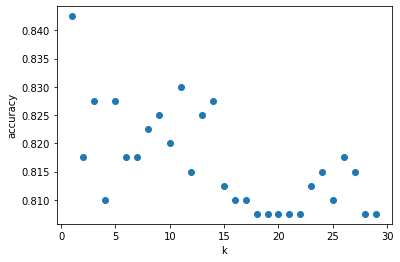

In [25]:
k_range = range(1,30)
scores = []
for k in k_range:
  knn = KNeighborsClassifier (n_neighbors = k)
  scores.append(sklearn.model_selection.cross_val_score(knn, X, y, cv=10).mean())
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt. show()

In [26]:
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors =1)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_classifier, X, y, cv=10)
print (scores)
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.875 0.875 0.875 0.9   0.85  0.825 0.875 0.775 0.825 0.75 ]
Accuracy: 0.84 (+/- 0.05)


#3.0. Building the Classification Model with Logistic Regression

##3.1. Some additional features

In [29]:
mainpost_count = discussion_df[discussion_df['is_reply'] == 1].groupby('student_id').agg('count').reset_index()[['student_id', 'datetime']].rename(columns={'datetime':'mainpost_count'})
reply_count = discussion_df[discussion_df['is_reply']==0].groupby('student_id').agg('count').reset_index()[['student_id', 'datetime']].rename(columns={'datetime': 'reply_count'})
student_df_extended = student_df.merge(mainpost_count, on='student_id', how='outer')
student_df_extended = student_df_extended.merge(reply_count, on='student_id', how='outer')

In [30]:
video_df.rename(columns={'datetime': 'datetime_1'}, inplace=True)
video_df['datetime_2'] = video_df['datetime_1'].shift(-1)
video_df.head(3)

,action,datetime_1,student_id,datetime_2
0,play,2018-01-25 05:41:09,1,2018-01-25 06:59:09
1,pause,2018-01-25 06:59:09,1,2018-01-19 04:06:25
2,play,2018-01-19 04:06:25,1,2018-01-19 05:23:25


In [31]:
video_df_x = video_df[video_df['action'] == 'play']
video_df_x.head(3)

,action,datetime_1,student_id,datetime_2
0,play,2018-01-25 05:41:09,1,2018-01-25 06:59:09
2,play,2018-01-19 04:06:25,1,2018-01-19 05:23:25
4,play,2018-01-21 21:51:55,2,2018-01-21 22:54:55


In [32]:
video_df_x['duration'] = pd.to_datetime(video_df['datetime_2']) - pd.to_datetime(video_df_x['datetime_1'])
video_df_x['duration_mins']=(video_df_x['duration']).dt.seconds/60
video_durations = video_df_x.groupby('student_id').agg('sum').reset_index()
video_durations.head(3)

,student_id,duration_mins
0,1,155.0
1,2,63.0
2,3,75.0


In [33]:
student_df_extended = student_df_extended.merge(video_durations, on='student_id', how='outer')
student_df_extended.head (3)

,student_id,pw_count,disc_count,video_count,quiz count,PASS,mainpost_count,reply_count,duration_mins
0,1,27,2.0,4.0,2.0,1.0,1.0,1.0,155.0
1,2,31,6.0,2.0,3.0,1.0,6.0,NaN,63.0
2,3,22,6.0,2.0,4.0,1.0,6.0,NaN,75.0


In [34]:
# total number of page views per user
quiz_unique_counts = quiz_df.groupby('student_id').agg({'quiz_id': 'nunique'}).reset_index().rename(columns={'quiz_id': 'ttl_quiz_unique_count'})
student_df_extended = student_df_extended.merge (quiz_unique_counts, on='student_id', how='outer')

In [35]:
student_df_extended.fillna(0, inplace = True)
student_df_extended.head(3)

,student_id,pw_count,disc_count,video_count,quiz count,PASS,mainpost_count,reply_count,duration_mins,ttl_quiz_unique_count
0,1,27,2.0,4.0,2.0,1.0,1.0,1.0,155.0,2.0
1,2,31,6.0,2.0,3.0,1.0,6.0,0.0,63.0,2.0
2,3,22,6.0,2.0,4.0,1.0,6.0,0.0,75.0,4.0


##3.2. Visualizing the data

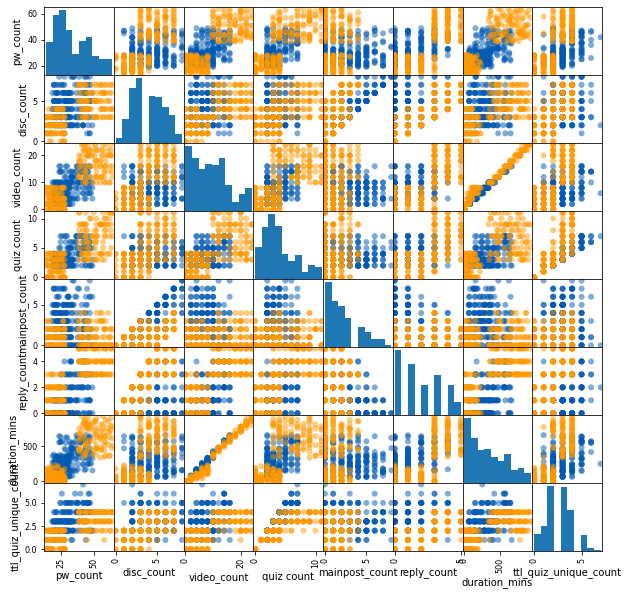

In [36]:
X = student_df_extended.drop(['student_id','PASS'], axis=1)
y = student_df_extended['PASS']
color_wheel = {1: "#0059b3", 0: "#ff9900"}
colors = student_df["PASS"].map(lambda x: color_wheel.get(x))
scatter = pd.plotting.scatter_matrix(X, color=colors, marker = 'o', figsize=(10, 10))
plt.show()

##3.3. Building the Logistic Regression Classifier

In [38]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0, test_size=0.33)
print(len(X_train), len(X_test))
classifier = linear_model.LogisticRegression(penalty='l1', solver='liblinear', tol=0.05, random_state=0)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, predicted))

268 132
0.9090909090909091


In [40]:
print ('LOGISTIC-----')
print ("Classification report for classifier %s: \n%s\n" % (classifier, sklearn.metrics.classification_report(y_test,predicted)))
print("Confusion matrix: \n%s" % sklearn.metrics.confusion_matrix(y_test, predicted))

LOGISTIC-----
Classification report for classifier LogisticRegression(penalty='l1', random_state=0, solver='liblinear', tol=0.05): 
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        64
         1.0       0.88      0.96      0.92        68

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132


Confusion matrix: 
[[55  9]
 [ 3 65]]


##3.4. Penalizing the coefficients in Logistic Regression: Identifying the Important Features

In [42]:
feature_importance = pd.DataFrame()
feature_importance['coef_'] = pd.DataFrame(data={'coef_': classifier.coef_[0]})[['coef_']]
feature_importance['feature'] = X.columns
print (feature_importance)

      coef_                feature
0 -0.061793               pw_count
1  0.000000             disc_count
2 -1.103370            video_count
3 -0.801852             quiz count
4  0.470281         mainpost_count
5 -0.640368            reply_count
6  0.029627          duration_mins
7  2.150157  ttl_quiz_unique_count


##3.5. Calculating the probabilities

In [44]:
probas_= classifier.predict_proba(X_test)
print (probas_[0:10])

[[5.56700807e-03 9.94432992e-01]
 [9.87897993e-01 1.21020068e-02]
 [9.59285320e-01 4.07146797e-02]
 [1.61723435e-02 9.83827657e-01]
 [6.78779045e-01 3.21220955e-01]
 [1.08169190e-02 9.89183081e-01]
 [1.18873508e-01 8.81126492e-01]
 [9.96085319e-01 3.91468107e-03]
 [5.77177028e-02 9.42282297e-01]
 [9.99557053e-01 4.42947002e-04]]


In [45]:
X_test.head(3)

,pw_count,disc_count,video_count,quiz count,mainpost_count,reply_count,duration_mins,ttl_quiz_unique_count
132,33,8.0,12.0,5.0,4.0,4.0,481.0,5.0
309,28,3.0,8.0,2.0,2.0,1.0,174.0,1.0
341,26,4.0,0.0,3.0,1.0,3.0,0.0,1.0


In [46]:
feature_scores_132 = X_test.loc[132, :].tolist()
print (feature_scores_132)

[33.0, 8.0, 12.0, 5.0, 4.0, 4.0, 481.0, 5.0]


In [47]:
from scipy.stats import logistic
logistic.cdf(np.dot (feature_scores_132, classifier.coef_[0]) + classifier.intercept_)

array([0.99443299])